<span style="font-size:24px; font-weight:bold;">Installing Libraries</span>

In [3]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install graphviz

In [5]:
pip install pydot graphviz pydotplus

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install langdetect 

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


<span style="font-size:24px; font-weight:bold;">Importing Libraries</span>

In [22]:
import pandas as pd
import os
import numpy as np
import geopandas
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from langdetect import detect_langs
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from textblob import TextBlob
from folium.plugins import HeatMap
from tqdm.notebook import tqdm
from langdetect import detect
from tqdm import tqdm
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objs as go
import spacy
from transformers import pipeline
from IPython.display import IFrame
from plotly.offline import iplot
from plotly.offline import plot
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from geopy.geocoders import Nominatim
from cachetools import cached, TTLCache
from geopy.exc import GeocoderUnavailable
import time
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from transformers import BertTokenizer, BertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from transformers import AutoModelForSequenceClassification
from transformers import TFBertForSequenceClassification, TFTrainer, TFTrainingArguments
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Loss
from tensorflow.keras import backend as K
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0' 
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using the {device} device.')
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using the cuda device.


In [23]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


<span style="font-size:24px; font-weight:bold;">Loading Data/ Data Preprocessing</span>

In [26]:
data=pd.read_csv('Main_Dataset.csv', index_col=False) 

In [27]:
data


,id,text,user_id,timestamp,cluster_id
0,0,wow didn’t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2
3,3,anyone tryna hit the gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2
4,4,are you kidding me this intro is crazy.,2.963951e+07,2021-08-06 03:44:29,2
...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996
604203,604203,if you’re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604206 entries, 0 to 604205
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          604206 non-null  int64  
 1   text        604206 non-null  object 
 2   user_id     604206 non-null  float64
 3   timestamp   591412 non-null  object 
 4   cluster_id  604206 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.0+ MB


In [29]:
data.isna().sum()

id                0
text              0
user_id           0
timestamp     12794
cluster_id        0
dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
geo_data=pd.read_csv('Clusters_Coordinates.csv')

In [32]:
geo_data

,cluster_id,lat,lng
0,2,34.020789,-118.411907
1,3,31.168893,-100.076888
2,8,29.838495,-95.446487
3,9,40.780709,-73.968542
4,16,40.004866,-75.117998
...,...,...,...
845,2989,42.651668,-83.291425
846,2991,32.415051,-99.750556
847,2992,31.994300,-102.104627
848,2994,38.653771,-90.247824


In [33]:
complete_data=pd.merge(data, geo_data, on='cluster_id')

In [34]:
complete_data

,id,text,user_id,timestamp,cluster_id,lat,lng
0,0,wow didn’t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907
3,3,anyone tryna hit the gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907
4,4,are you kidding me this intro is crazy.,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907
...,...,...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936
604203,604203,if you’re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936


In [38]:
complete_data

,id,text,user_id,timestamp,cluster_id,lat,lng
0,0,wow didn’t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907
3,3,anyone tryna hit the gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907
4,4,are you kidding me this intro is crazy.,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907
...,...,...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936
604203,604203,if you’re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936


In [36]:
import plotly.graph_objects as go
import pandas as pd

In [40]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604206 entries, 0 to 604205
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          604206 non-null  int64  
 1   text        604206 non-null  object 
 2   user_id     604206 non-null  float64
 3   timestamp   591412 non-null  object 
 4   cluster_id  604206 non-null  int64  
 5   lat         604206 non-null  float64
 6   lng         604206 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 36.9+ MB


In [41]:
complete_data.dropna(inplace=True)
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591412 entries, 0 to 604205
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          591412 non-null  int64  
 1   text        591412 non-null  object 
 2   user_id     591412 non-null  float64
 3   timestamp   591412 non-null  object 
 4   cluster_id  591412 non-null  int64  
 5   lat         591412 non-null  float64
 6   lng         591412 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 36.1+ MB


In [42]:
complete_data['text']

0         wow didn’t know the homies were coming through...
1         the foggy nights in la be peaceful such a calm...
2                                           khamisvideobomb
3                            anyone tryna hit the gym 4 hmu
4                   are you kidding me this intro is crazy.
                                ...                        
604201    all students must be dressed appropriately eac...
604202    i actually hate working with the lunch shift c...
604203                        if you’re reading thisyo mama
604204                                     i mean secondddd
604205    mixing different kinds of tide pods and downy ...
Name: text, Length: 591412, dtype: object

In [43]:
complete_data['timestamp']= pd.to_datetime(complete_data['timestamp'])

In [44]:
complete_data['timestamp']

0        2021-08-02 01:25:46
1        2021-08-28 08:47:36
2        2021-08-13 15:49:15
3        2021-08-31 22:41:20
4        2021-08-06 03:44:29
                 ...        
604201   2021-08-12 11:08:07
604202   2021-08-04 15:35:10
604203   2021-08-24 00:49:46
604204   2021-08-02 17:02:13
604205   2021-08-17 20:02:40
Name: timestamp, Length: 591412, dtype: datetime64[ns]

<span style="font-size:24px; font-weight:bold;">Extracting Sample Data for Analysis</span>

In [45]:
sample_data= complete_data

In [46]:
sample_data

,id,text,user_id,timestamp,cluster_id,lat,lng
0,0,wow didn’t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907
3,3,anyone tryna hit the gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907
4,4,are you kidding me this intro is crazy.,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907
...,...,...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936
604203,604203,if you’re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936


In [47]:
def clear_text(text):
    pattern = r"[^a-zA-Z']"
    text = re.sub(pattern, ' ', text.lower())
    text = text.split()
    text = " ".join(text)
    return text

In [48]:
tqdm.pandas()
sample_data['text'] = sample_data['text'].progress_apply(clear_text)

100%|██████████| 591412/591412 [00:03<00:00, 179234.24it/s]


In [54]:
map = folium.Map()

In [55]:
for index, row in complete_data.iterrows():
    lat, lng = row['lat'], row['lng']
    folium.Marker([lat, lng]).add_to(map)

In [ ]:
from IPython.display import display
display(map)

In [56]:
map.save('map_folim.html')

In [57]:
sample_data['text'].head()

0    wow didn t know the homies were coming through...
1    the foggy nights in la be peaceful such a calm...
2                                      khamisvideobomb
3                         anyone tryna hit the gym hmu
4               are you kidding me this intro is crazy
Name: text, dtype: object

In [58]:
def get_language_label(text):
    try:
        lang = detect(text)
        if lang == 'en':
            return '0'
        elif lang == 'es':
            return '1'
        else:
            return '3'
    except:
        return '3'

In [59]:
%%time

with tf.device('/GPU:0'):
    sample_data['language']=sample_data['text'].progress_apply(get_language_label)
    

100%|██████████| 591412/591412 [37:21<00:00, 263.81it/s]

CPU times: user 37min 9s, sys: 17.3 s, total: 37min 27s
Wall time: 37min 21s


In [64]:
sample_data['language'].value_counts().sort_values()

1     61179
3     85409
0    444824
Name: language, dtype: int64

In [61]:
#print('English Text Proportion', len(sample_data[sample_data['language'] == '0']) / len(sample_data))
#print('Spanish Text Proportion',len(sample_data[sample_data['language'] == '1']) / len(sample_data))
#print('Other Text Proportion',len(sample_data[sample_data['language'] == '3']) / len(sample_data))

In [65]:
interp_other_lang=sample_data[sample_data['language'] == '3']
interp_other_lang

,id,text,user_id,timestamp,cluster_id,lat,lng,language
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907,3
11,11,nobody own you shit,7.445710e+07,2021-02-02 09:41:32,2,34.020789,-118.411907,3
12,12,i think we will def see pyra mythra,2.820968e+09,2021-08-18 20:06:21,2,34.020789,-118.411907,3
29,29,let s hoop,1.376966e+18,2021-08-04 07:21:36,2,34.020789,-118.411907,3
39,39,strong colors,1.358342e+09,2021-08-05 03:44:00,2,34.020789,-118.411907,3
...,...,...,...,...,...,...,...,...
604168,604168,still no ac,1.062934e+18,2021-08-01 21:12:00,2996,29.668301,-95.158936,3
604171,604171,ivan is single like me,3.406412e+08,2021-08-02 04:39:00,2996,29.668301,-95.158936,3
604178,604178,gooooooolllll de funeeesss moriiiiiii,2.894717e+08,2021-08-16 01:11:46,2996,29.668301,-95.158936,3
604179,604179,in my body,1.090777e+18,2021-08-21 12:28:51,2996,29.668301,-95.158936,3


In [66]:
with tf.device('/GPU:0'):
    sample_data['language'] = sample_data['language'].astype(int)
    


In [67]:
sample_data.isna().sum()

id            0
text          0
user_id       0
timestamp     0
cluster_id    0
lat           0
lng           0
language      0
dtype: int64

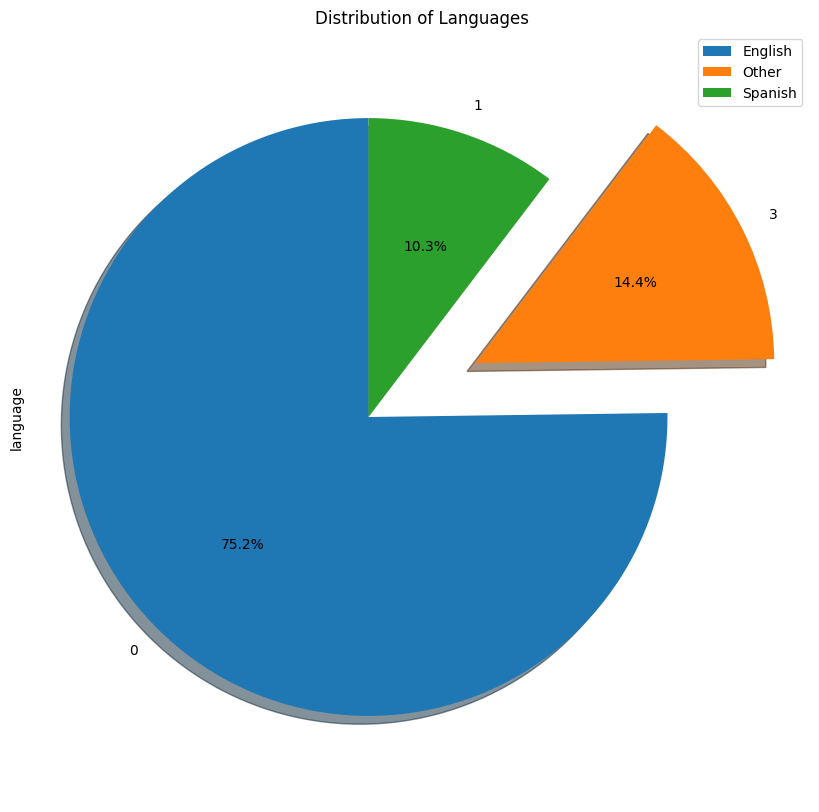

In [68]:
lang_dist=sample_data['language'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
explode = [0, 0.4, 0]
lang_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,10), colors=colors, shadow=True, explode=explode)
labels = ['English', 'Other', 'Spanish']
plt.title('Distribution of Languages')
plt.axis('equal')  # This ensures that the pie is drawn as a circle.
plt.legend(labels=labels, loc="best")
plt.show()

In [69]:
sample_data['tweet_month']=sample_data['timestamp'].dt.month
sample_data['tweet_day']=sample_data['timestamp'].dt.day

In [70]:
sample_data

,id,text,user_id,timestamp,cluster_id,lat,lng,language,tweet_month,tweet_day
0,0,wow didn t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907,0,8,2
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907,0,8,28
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907,3,8,13
3,3,anyone tryna hit the gym hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907,0,8,31
4,4,are you kidding me this intro is crazy,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907,0,8,6
...,...,...,...,...,...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936,0,8,12
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936,0,8,4
604203,604203,if you re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936,0,8,24
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936,3,8,2


In [134]:
complete_data=complete_data.dropna()

In [138]:
pip install -U kaleido


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 23.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
geolocator = Nominatim(user_agent="my-app")

In [72]:
def get_region_name(row):
    lat, lon = row["lat"], row["lng"]
    while True:
        try:
            location = geolocator.reverse(f"{lat}, {lon}")
            address = location.raw["address"]
            if "region" in address:
                region_name = address["region"]
            elif "state" in address:
                region_name = address["state"]
            else:
                region_name = None
            return region_name
        except GeocoderUnavailable:
            time.sleep(2)  # wait for 1 second before retrying
            continue

In [73]:

# Set up geolocator and cache
geolocator = Nominatim(user_agent="my-app")
cache = TTLCache(maxsize=1000, ttl=60*60*24)  # Cache for 1 dayb

In [74]:
# Define function to get region name
@cached(cache)
def get_region_name(lat, lon):
    location = geolocator.reverse(f"{lat}, {lon}")
    address = location.raw["address"]
    if "region" in address:
        region_name = address["region"]
    elif "state" in address:
        region_name = address["state"]
    else:
        region_name = None
    return region_name

In [75]:
%%time
with tf.device('/gpu:0'):
    batch_size = 1000
    n_batches = (len(sample_data) - 1) // batch_size + 1
    regions = []
    for i in range(n_batches):
        batch = sample_data.iloc[i*batch_size:(i+1)*batch_size]
        regions.extend(batch.apply(lambda row: get_region_name(row['lat'], row['lng']), axis=1))

# Batch processing

    



CPU times: user 9.44 s, sys: 428 ms, total: 9.87 s
Wall time: 7min 5s


In [76]:
# Assign regions to new column in sample_data
sample_data.loc[:, 'region'] = regions

In [77]:
sample_data.isna().sum()

id                 0
text               0
user_id            0
timestamp          0
cluster_id         0
lat                0
lng                0
language           0
tweet_month        0
tweet_day          0
region         21097
dtype: int64

In [78]:
eda_data=sample_data.dropna()

In [79]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570315 entries, 0 to 604205
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           570315 non-null  int64         
 1   text         570315 non-null  object        
 2   user_id      570315 non-null  float64       
 3   timestamp    570315 non-null  datetime64[ns]
 4   cluster_id   570315 non-null  int64         
 5   lat          570315 non-null  float64       
 6   lng          570315 non-null  float64       
 7   language     570315 non-null  int64         
 8   tweet_month  570315 non-null  int64         
 9   tweet_day    570315 non-null  int64         
 10  region       570315 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 52.2+ MB


In [91]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591412 entries, 0 to 604205
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           591412 non-null  int64         
 1   text         591412 non-null  object        
 2   user_id      591412 non-null  float64       
 3   timestamp    591412 non-null  datetime64[ns]
 4   cluster_id   591412 non-null  int64         
 5   lat          591412 non-null  float64       
 6   lng          591412 non-null  float64       
 7   language     591412 non-null  int64         
 8   tweet_month  591412 non-null  int64         
 9   tweet_day    591412 non-null  int64         
 10  region       570315 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 54.1+ MB


In [ ]:
eda_data.info()

In [81]:
import pandas as pd
import plotly.express as px

In [86]:
region_counts_info = eda_data.groupby('region')['text'].count().sort_values().reset_index()

In [132]:
region_counts_info.info()
excel_file_path = '/notebooks/excel_files.xlsx'

# Save the DataFrame as an Excel file
region_counts_info.to_excel(excel_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  111 non-null    object
 1   text    111 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [88]:
import pandas as pd
import plotly.graph_objects as go

 #Assuming you have a DataFrame named 'region_counts_info' with columns 'region' and 'text'

fig = go.Figure(data=[go.Bar(x=region_counts_info['region'], y=region_counts_info['text'])])

fig.update_layout(
    title='Number of Text Counts per Region',
    xaxis_title='Region',
    yaxis_title='Text Count'
)

fig.show()

In [92]:
sample_data=sample_data.dropna()

In [93]:
model_data=sample_data[['text', 'region', 'tweet_day', 'tweet_month','lat','language', 'lng']] #add langugage later

<span style="font-size:24px; font-weight:bold;">Preprocess Text for Model Training</span>

In [94]:
model_data.head()

,text,region,tweet_day,tweet_month,lat,language,lng
0,wow didn t know the homies were coming through...,California,2,8,34.020789,0,-118.411907
1,the foggy nights in la be peaceful such a calm...,California,28,8,34.020789,0,-118.411907
2,khamisvideobomb,California,13,8,34.020789,3,-118.411907
3,anyone tryna hit the gym hmu,California,31,8,34.020789,0,-118.411907
4,are you kidding me this intro is crazy,California,6,8,34.020789,0,-118.411907


In [95]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570315 entries, 0 to 604205
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   text         570315 non-null  object 
 1   region       570315 non-null  object 
 2   tweet_day    570315 non-null  int64  
 3   tweet_month  570315 non-null  int64  
 4   lat          570315 non-null  float64
 5   language     570315 non-null  int64  
 6   lng          570315 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.8+ MB


In [96]:
import re

def clean_text(text):
  text = re.sub(r"[^\w\s]", "", text)
  return text



In [97]:
model_data = model_data.assign(text=model_data["text"].apply(clean_text))

In [98]:
model_data['text'][1]

'the foggy nights in la be peaceful such a calming chill vibe'

In [ ]:
model_data

In [ ]:
model_data=model_data.dropna()

In [ ]:
model_data.isna().sum()

### **Model Building**

In [99]:
import math
def haversine_distance(ytrue, ypred):
    R = 6371  # radius of the earth in kilometers
    lat1_rad = tf.math.divide(tf.math.multiply(ytrue[:, 0], math.pi), 180.0)
    lon1_rad = tf.math.divide(tf.math.multiply(ytrue[:, 1], math.pi), 180.0)
    lat2_rad = tf.math.divide(tf.math.multiply(ypred[:, 0], math.pi), 180.0)
    lon2_rad = tf.math.divide(tf.math.multiply(ypred[:, 1], math.pi), 180.0)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = tf.math.square(tf.math.sin(dlat / 2)) + tf.math.cos(lat1_rad) * tf.math.cos(lat2_rad) * tf.math.square(tf.math.sin(dlon / 2))
    c = 2 * tf.math.atan2(tf.math.sqrt(a), tf.math.sqrt(1 - a))
    distance = R * c
    return distance

In [110]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D

SPLIT DATA INTO TRAINING, VALIDATION AND TESTING SETS

In [100]:
#train_data, test_data = train_test_split(model_data, test_size=.2, random_state=42)
#train_data, val_data = train_test_split(train_data, test_size=.2, random_state=42)
X=model_data[['tweet_day', 'tweet_month', 'language', 'text']]
y=model_data[['lat', 'lng']]

In [101]:
X.isna().sum()
y.isna().sum()

lat    0
lng    0
dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(365001, 4)
(365001, 2)
(91251, 4)
(91251, 2)
(114063, 4)
(114063, 2)


In [104]:
numerical=['tweet_day', 'tweet_month', 'language']

In [105]:
numerical_train_input=X_train[numerical]
numerical_val_input=X_val[numerical]
numerical_test_input=X_test[numerical]

In [106]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
label_encoder.fit(numerical_train_input['language'])
label_encoder.fit(numerical_val_input['language'])
label_encoder.fit(numerical_test_input['language'])

# Encode the 'language' column
numerical_train_input['language_encoded'] = label_encoder.transform(numerical_train_input['language'])
numerical_val_input['language_encoded'] = label_encoder.transform(numerical_val_input['language'])
numerical_test_input['language_encoded'] = label_encoder.transform(numerical_test_input['language'])

In [107]:
numerical_train_input=numerical_train_input.drop(['language'], axis=1)
numerical_val_input=numerical_val_input.drop(['language'], axis=1)
numerical_test_input=numerical_test_input.drop(['language'], axis=1)

In [108]:
numerical_train_input.shape

(365001, 3)

In [111]:
%%time
train_encodings = tokenizer(X_train['text'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(X_val['text'].tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test['text'].tolist(), truncation=True, padding=True)


CPU times: user 52 s, sys: 6.95 s, total: 59 s
Wall time: 23.5 s


In [112]:
max_seq_length = max(max(len(seq) for seq in train_encodings['input_ids']),
                     max(len(seq) for seq in val_encodings['input_ids']),
                     max(len(seq) for seq in test_encodings['input_ids']))

In [113]:
print(max_seq_length)
#All tokenized sequences will be padded or truncated to have a length of 155 tokens
#Any sequence longer than 155 tokens will be truncated, and any sequence shortedr than 155 tokens will be padded with special tokens or zeros


155


In [114]:
train_input_ids = pad_sequences(train_encodings['input_ids'], maxlen=max_seq_length, padding='post', truncating='post')
val_input_ids = pad_sequences(val_encodings['input_ids'], maxlen=max_seq_length, padding='post', truncating='post')
test_input_ids = pad_sequences(test_encodings['input_ids'], maxlen=max_seq_length, padding='post', truncating='post')


In [ ]:
val_input_ids.shape


In [115]:
train_attention_masks = pad_sequences(train_encodings['attention_mask'], maxlen=max_seq_length, padding='post', truncating='post')
val_attention_masks = pad_sequences(val_encodings['attention_mask'], maxlen=max_seq_length, padding='post', truncating='post')
test_attention_masks = pad_sequences(test_encodings['attention_mask'], maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:
val_attention_masks.shape
test_attention_masks.shape
train_attention_masks.shape

In [ ]:
%load_ext tensorboard

import datetime

# Clear any logs from previous runs
#rm -rf ./logs/

LOAD THE MODEL

In [116]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from transformers import TFAutoModel

In [121]:
import keras
from keras.models import load_model
from transformers import TFBertModel  # or any related classes you might be using
custom_objects = {'TFBertModel': TFBertModel, 'haversine_distance': haversine_distance}

In [122]:
model = load_model('/notebooks/model_results/model_keras2.h5', custom_objects=custom_objects)

In [125]:
model.compile(optimizer=optimizer, loss= haversine_distance, metrics=['mse'])

In [126]:
test_loss, test_mse = model.evaluate([numerical_test_input, test_input_ids, test_attention_masks], y_test)

3565/3565 [==============================] - 446s 123ms/step - loss: 1334.2502 - mse: 149.9435


In [ ]:
num_features=3


In [ ]:
numerical_input=Input(shape=(num_features,), dtype=tf.float32)

In [ ]:
input_ids = Input(shape=(max_seq_length,), dtype=tf.int32)
attention_masks = Input(shape=(max_seq_length,), dtype=tf.int32)

In [ ]:
base_model = TFAutoModel.from_pretrained('bert-base-uncased', trainable=False)(input_ids, attention_mask=attention_masks)[0]
#Access [0] to extract only the first element of the output tuple, which represents the hidden state (embeddings from the BERT model)
x = GlobalAveragePooling1D()(base_model)
concatenated=Concatenate()([numerical_input, x])
x = Dense(128, activation='relu')(x)
x=Dense(64, activation='relu')(x)
output=Dense(2)(x)

In [ ]:
model=Model(inputs=[numerical_input, input_ids, attention_masks], outputs=output)

In [ ]:
#model = Model(inputs=[input_ids, attention_masks], outputs=output)

In [ ]:
print(model.summary())

In [124]:
initial_learning_rate = 0.001

# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_learning_rate)




In [ ]:
model.compile(optimizer=optimizer, loss= haversine_distance, metrics=['mse'])

In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
tensorboard = TensorBoard(log_dir='/notebooks/model_graphs')
checkpoint = ModelCheckpoint(filepath='/notebooks/model_graphs', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
tensorboard = TensorBoard(log_dir='/notebooks/model_training_performance')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#lr_scheduler adjusts the learning rate based on predefined rules or conditions. In this case, the metric monitor for improvement is 'val_loss' 
#factor is the factor by whihc the lr will be reduced (so we are ring by 10%)
#patience is the number of epochs with no improvement after which the lr will be reduced
#verbose is whether to display a message when the learning rate is reduced
#By reducing the lr, the model has a chance to explore different regions of the loss landscape and find better minima


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /notebooks/model_training_performance


In [ ]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

In [ ]:
strategy = tf.distribute.OneDeviceStrategy("GPU") if tf.config.list_physical_devices("GPU") else tf.distribute.OneDeviceStrategy("CPU")
history=model.fit([numerical_train_input, train_input_ids, train_attention_masks], y_train, validation_data=([numerical_val_input, val_input_ids, val_attention_masks], y_val), epochs=7, batch_size=2000, callbacks=[lr_scheduler, checkpoint, early_stopping, tensorboard, tensorboard_callback])

In [ ]:
history.history

In [ ]:
import json

history_dict = {
    'loss': history.history['loss'],
    'mse': history.history['mse'],
    'val_loss': history.history['val_loss'],
    'val_mse': history.history['val_mse']
}

# Save the training history as JSON
with open('/notebooks/model_saved/history2.json', 'w') as file:
    json.dump(history_dict, file)

In [ ]:
import pandas as pd

# Assuming you have the training history dictionary
history_dict = {
    'loss': [3610.067138671875, 1471.638671875, 1410.470458984375, 1384.9764404296875, 1370.6217041015625, 1362.1329345703125, 1356.255126953125],
    'mse': [1168.9366455078125, 175.5557403564453, 162.95565795898438, 158.44879150390625, 155.90530395507812, 154.4400634765625, 153.3901824951172],
    'val_loss': [1519.42919921875, 1419.909912109375, 1385.4854736328125, 1368.461669921875, 1357.6578369140625, 1350.5308837890625, 1345.5810546875],
    'val_mse': [184.3936309814453, 163.1677703857422, 159.04605102539062, 155.91067504882812, 154.57498168945312, 152.94566345214844, 152.71469116210938],
    'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
}

# Convert the dictionary to a DataFrame
history_df = pd.DataFrame(history_dict)

# Specify the file path
file_path = '/notebooks/model_results/history2.csv' 

# Save the DataFrame to a CSV file
history_df.to_csv(file_path, index=False)

print(f"The training history has been saved to {file_path}")

In [ ]:
# Evaluate the model on the test data
test_loss, test_mse = model.evaluate([numerical_test_input, test_input_ids, test_attention_masks], y_test)


In [ ]:
model.save('/notebooks/model_results/model_keras2.h5')

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history stored in the 'history' variable
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']
lr = history.history['lr']

epochs = range(1, len(loss) + 1)

# Plotting loss values
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting MSE values
plt.plot(epochs, mse, 'bo-', label='Training MSE')
plt.plot(epochs, val_mse, 'ro-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting learning rate values
plt.plot(epochs, lr, 'bo-')
plt.title('Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history stored in the 'history' variable
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']
lr = history.history['lr']

epochs = range(1, len(loss) + 1)

# Plotting loss values
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()

# Plotting MSE values
plt.plot(epochs, mse, 'b-', label='Training MSE')
plt.plot(epochs, val_mse, 'r-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting learning rate values
plt.plot(epochs, lr, 'bo-')
plt.title('Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

test_loss = 1334
test_mse = 149

# Create a bar plot to visualize test loss and test MSE
plt.bar(['Test Loss'], [test_loss], color='lightblue', label='Test Loss')
plt.bar(['Test MSE'], [test_mse], color='gray', label='Test MSE')

plt.title('Test Set Performance')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()